In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm

In [2]:
data=pd.read_csv('50_Startups.csv')

In [3]:
data.head()

,R_DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R_DSpend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


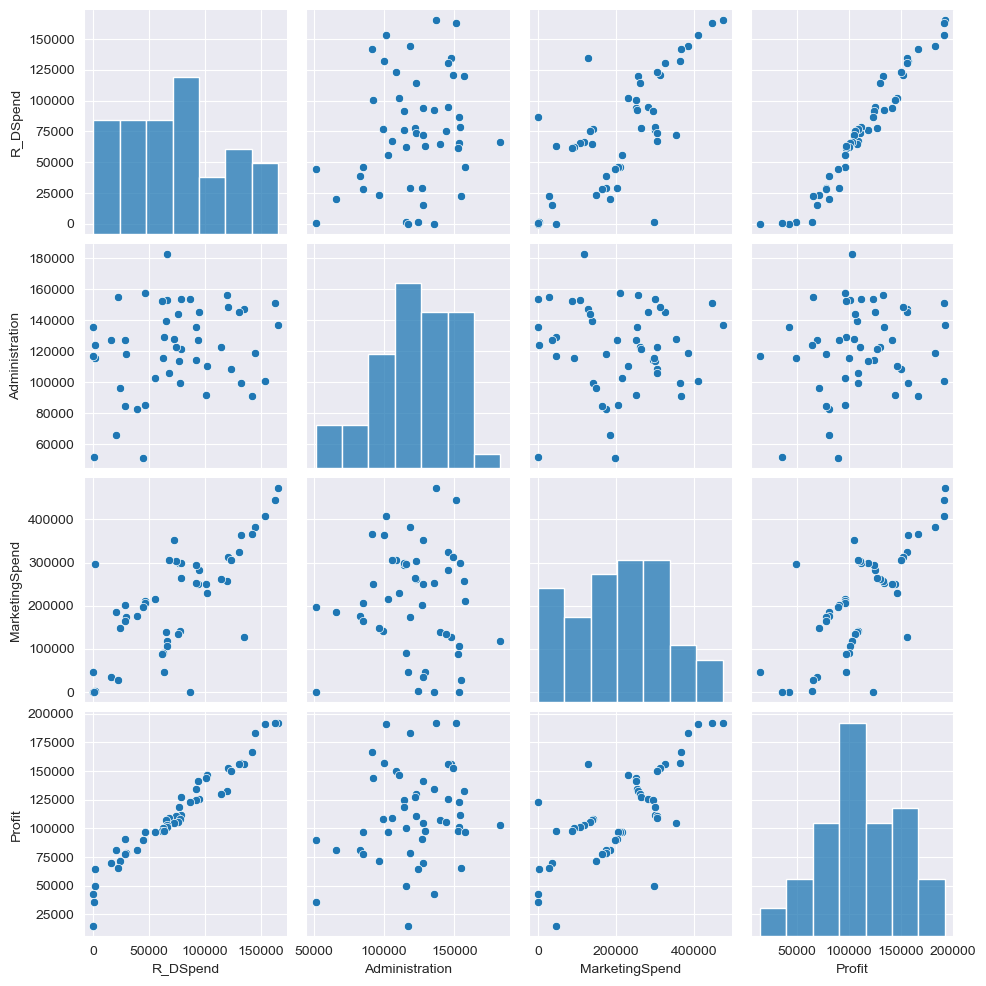

In [5]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [6]:
model=smf.ols('Profit~R_DSpend+Administration+MarketingSpend+State',data=data).fit()

In [7]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
R_DSpend                 0.806023
Administration          -0.027004
MarketingSpend           0.026980
dtype: float64

In [8]:
model.tvalues,'\n', model.pvalues

(Intercept             7.280560
 State[T.Florida]      0.058970
 State[T.New York]    -0.012864
 R_DSpend             17.368580
 Administration       -0.517012
 MarketingSpend        1.573889
 dtype: float64,
 '\n',
 Intercept            4.444178e-09
 State[T.Florida]     9.532429e-01
 State[T.New York]    9.897941e-01
 R_DSpend             2.578772e-21
 Administration       6.077373e-01
 MarketingSpend       1.226769e-01
 dtype: float64)

In [9]:
model.rsquared,model.rsquared_adj

(0.9507524843355148, 0.945156175737278)

In [10]:
rsq_rs=smf.ols('R_DSpend~Administration+MarketingSpend+State',data=data).fit().rsquared
vif_rs=1/(1-rsq_rs)

In [12]:
rsq_ad=smf.ols('Administration~R_DSpend+MarketingSpend+State',data=data).fit().rsquared
vif_ad=1/(1-rsq_ad)

In [13]:
rsq_ms=smf.ols('MarketingSpend~Administration+R_DSpend+State',data=data).fit().rsquared
vif_ms=1/(1-rsq_ms)

In [15]:
d= {'variables':['R_DSpend','Administration','MarketingSpend'], 'VIF':[vif_rs,vif_ad,vif_ms]}
vif_frame= pd.DataFrame(d)
vif_frame

,variables,VIF
0,R_DSpend,2.495511
1,Administration,1.177766
2,MarketingSpend,2.416797


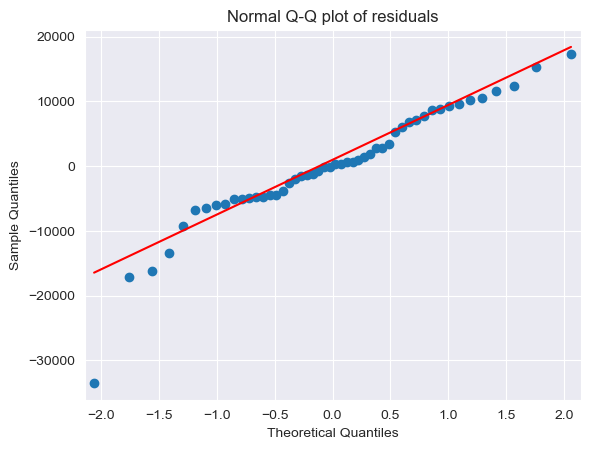

In [18]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [19]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [20]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

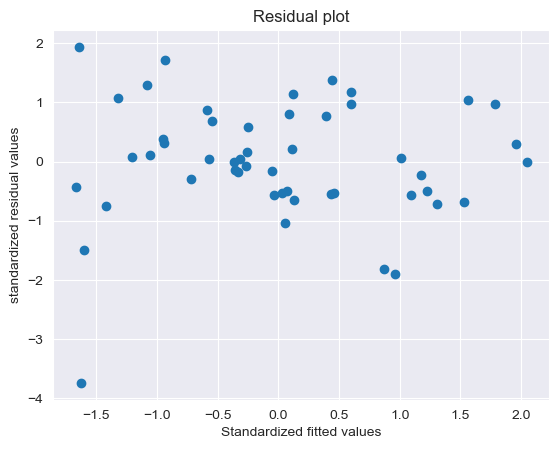

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

eval_env: 1


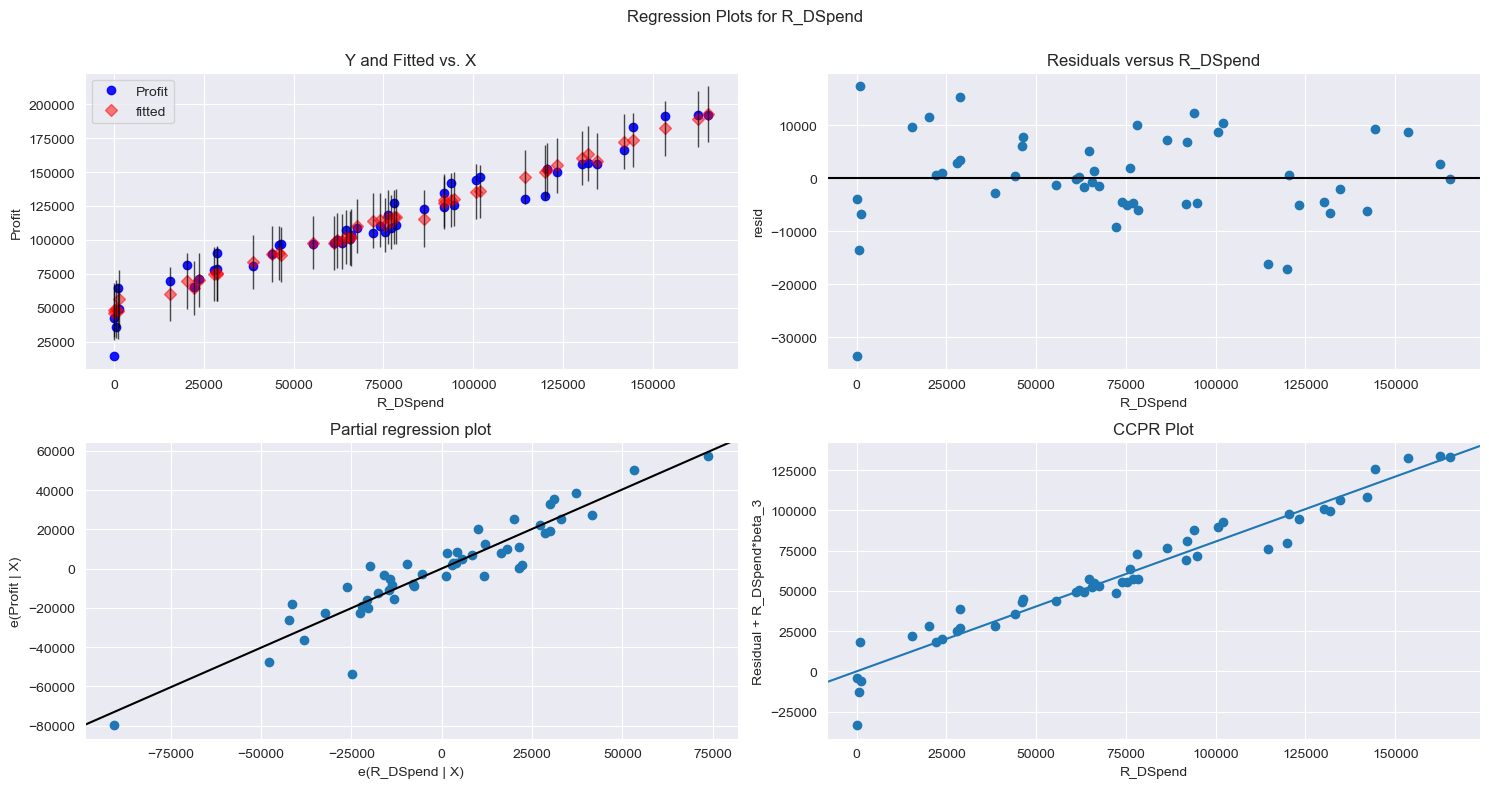

In [22]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'R_DSpend',fig=fig)
plt.show()

eval_env: 1


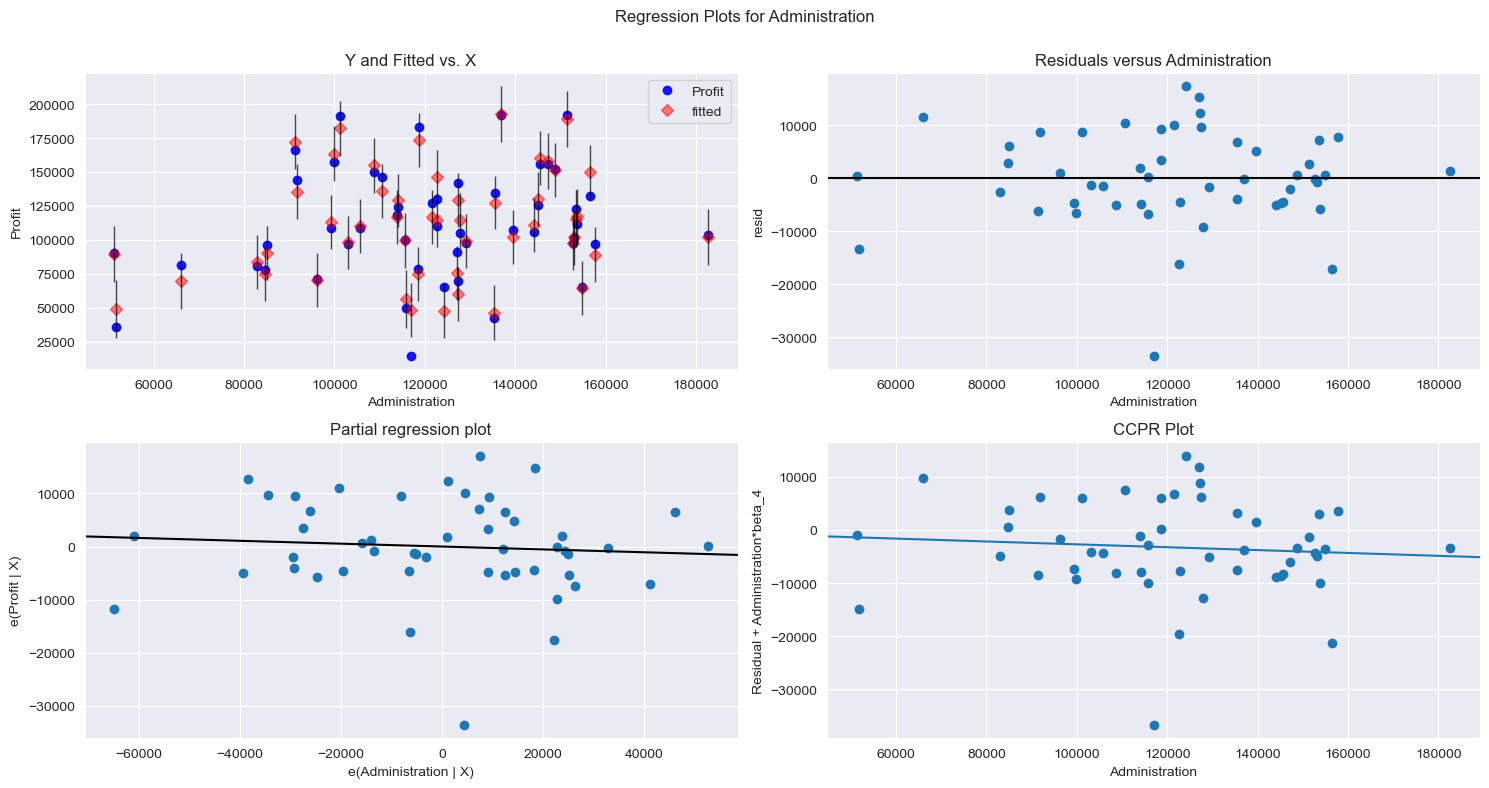

In [23]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

eval_env: 1


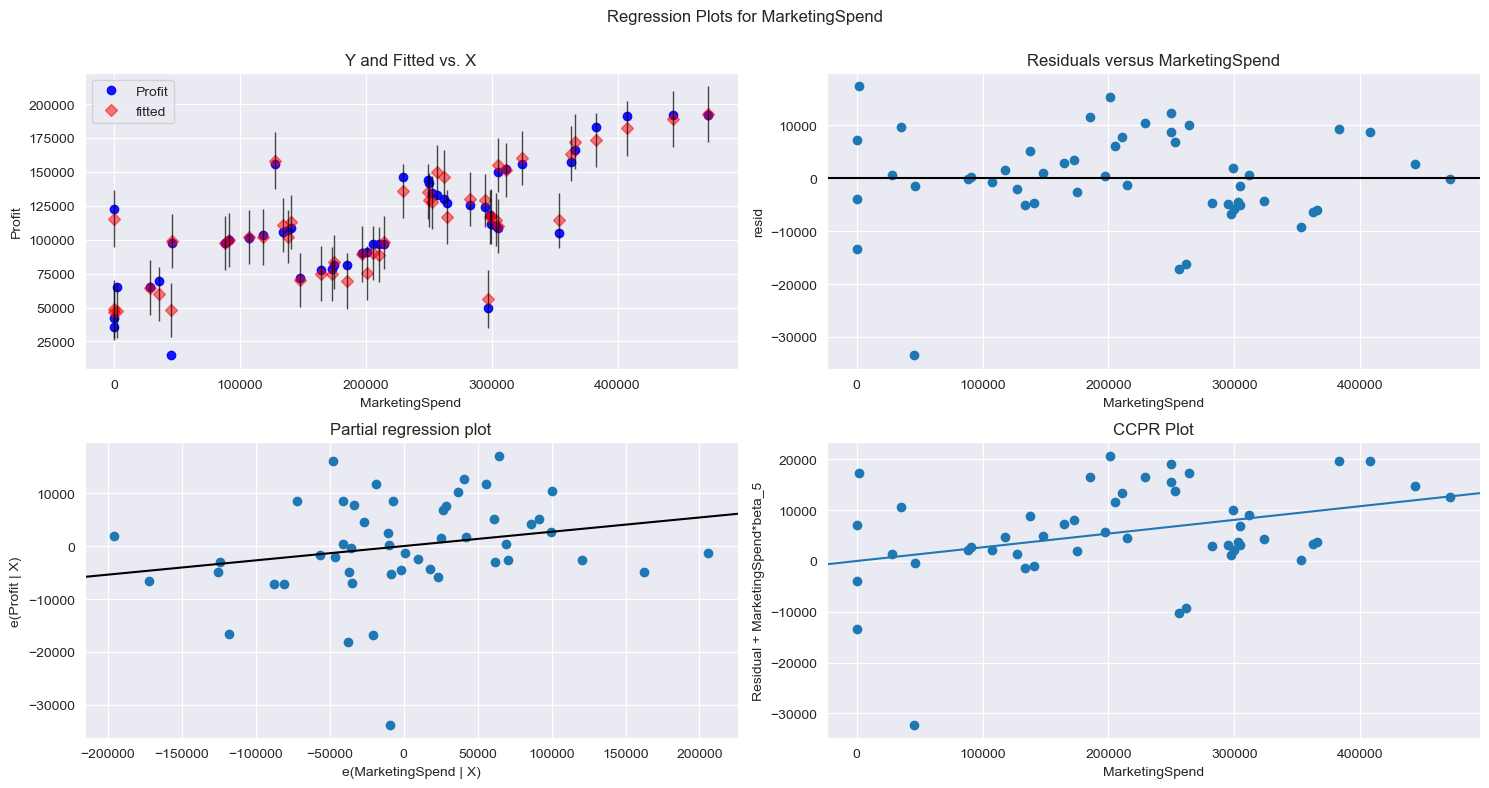

In [24]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'MarketingSpend',fig=fig)
plt.show()

In [25]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

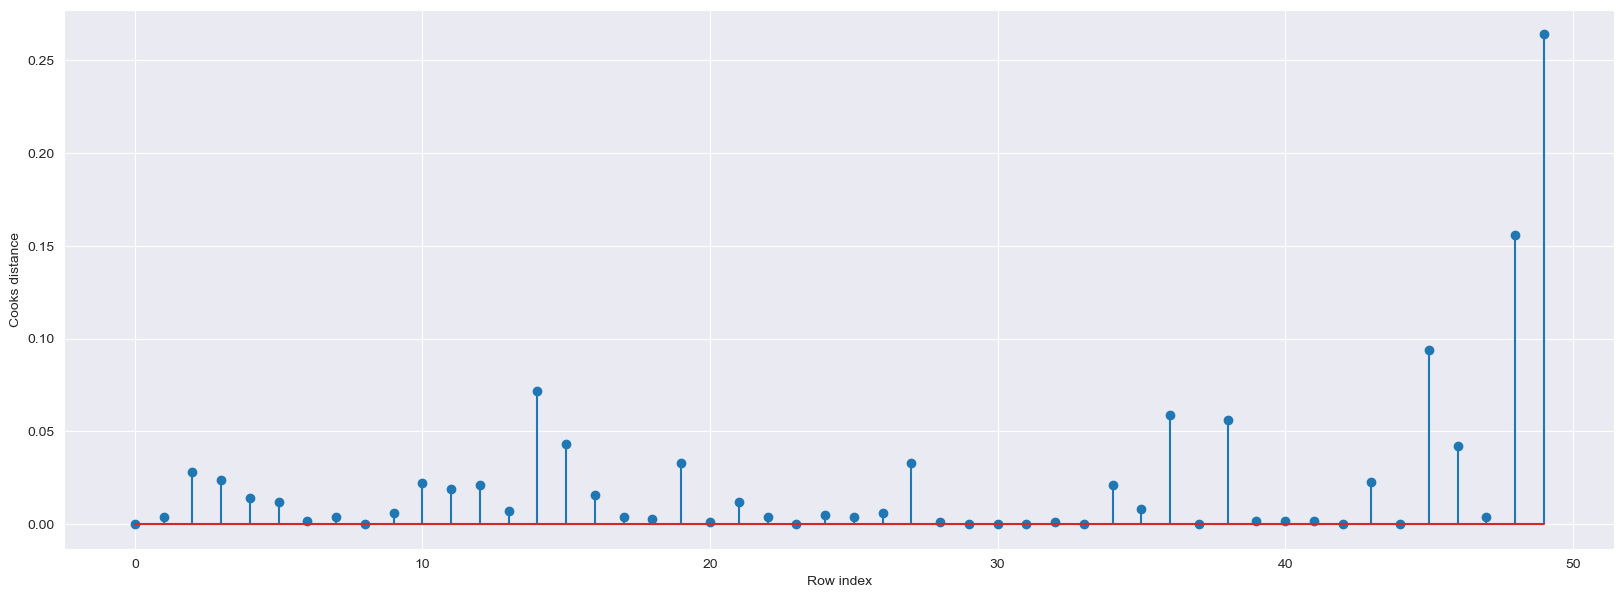

In [26]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [27]:
np.argmax(c),np.max(c)

(49, 0.2639594358692202)

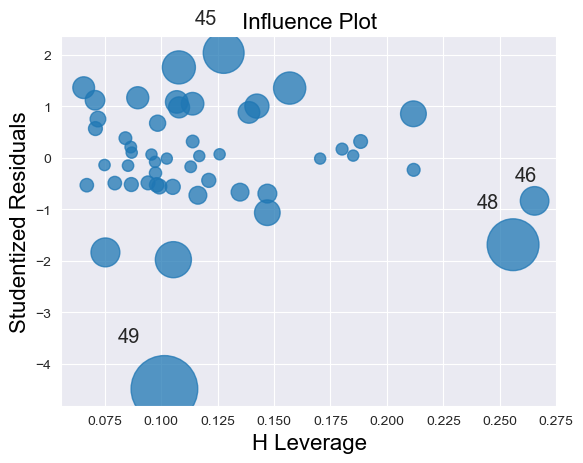

In [28]:
influence_plot(model)
plt.show()

In [29]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.36

In [31]:
data[data.index.isin([48,49])]

,R_DSpend,Administration,MarketingSpend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [32]:
data.head()

,R_DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [33]:
newdata=pd.read_csv('50_Startups.csv')

In [34]:
data2=newdata.drop(newdata.index[[48,49]],axis=0).reset_index()

In [35]:
data2=data2.drop(['index'],axis=1)

In [37]:
data2.head()

,R_DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [38]:
final_ml = smf.ols('Profit~R_DSpend+MarketingSpend+State',data = data).fit()

In [39]:
(final_ml.rsquared,final_ml.aic)

(0.950453304509085, 1061.067741856422)

In [40]:
final_ml = smf.ols('Profit~R_DSpend+Administration+State',data = data).fit()

In [43]:
(final_ml.rsquared,final_ml.aic)

(0.9479799298023537, 1063.503443921346)

In [44]:
new_data= pd.DataFrame({'R_DSpend':70000 ,'Administration':90000 ,'MarketingSpend':50000 ,'State': 'New York' },index=[1])

In [45]:
final_ml.predict(new_data)

1    110085.55653
dtype: float64

In [46]:
final_ml.predict(newdata.iloc[0:5,])

0    189700.624024
1    186608.031891
2    182463.965501
3    172602.148419
4    173220.367395
dtype: float64